In [1]:
import datetime

from model import *
from random_search import *
from grid_search import *
from experiment_helper import *
from bayesian_optimizer import *

%load_ext autoreload
%autoreload 2

# Optimization for Machine Learning

### Experiment 1: Gradient descent tuning

In [4]:
# fixed parameters
num_layers = 2
num_hidden = 100
num_epochs = 300
mini_batch_size=50

# variable parameters
lr_min, lr_max, lr_n = 0.0001, 1, 5
momentum_min, momentum_max, momentum_n = 0.0, 1.0, 10

# experiment parameters
seed = 0
num_trials = 50

#### Random search

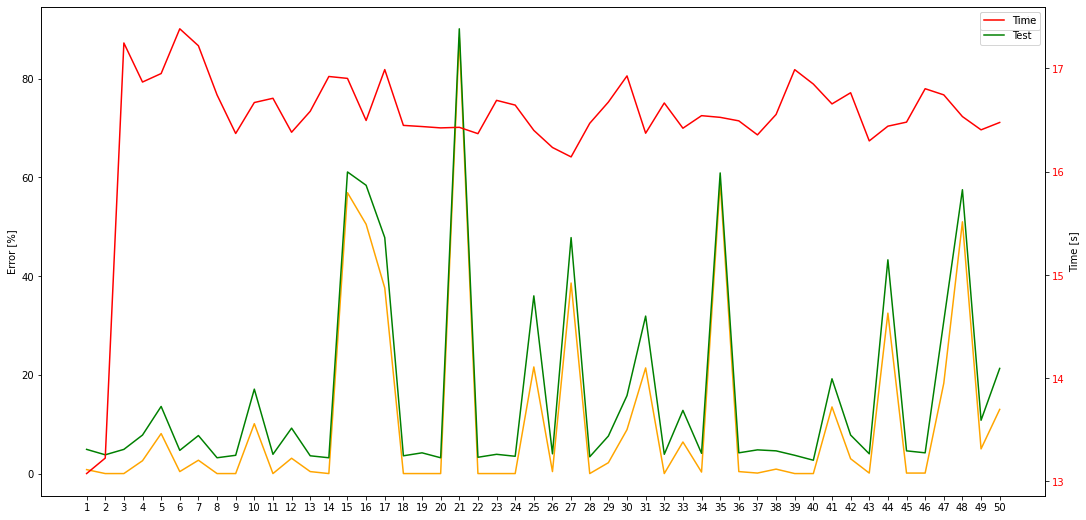

In [6]:
parameters_range = {'lr': (lr_min, lr_max, 'loguniform_10'),
                    'mini_batch_size': (mini_batch_size, mini_batch_size,  'fixed'),
                    'momentum': (momentum_min, momentum_max,  'uniform'),
                    'num_hidden': (num_hidden, num_hidden, 'fixed'),
                    'num_layers': (num_layers, num_layers, 'fixed'),
                    'num_epochs': (num_epochs, num_epochs, 'fixed')}
parameters = random_hyperparameters(parameters_range,num_trials, seed)
results = random_search(parameters)
visualize_experiment(results, 'random1-')

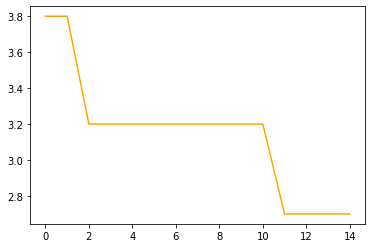

(range(0, 15),
 array([3.8, 3.8, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 2.7, 2.7,
        2.7, 2.7]))

In [7]:
visualize_run_time(results)

#### Grid search

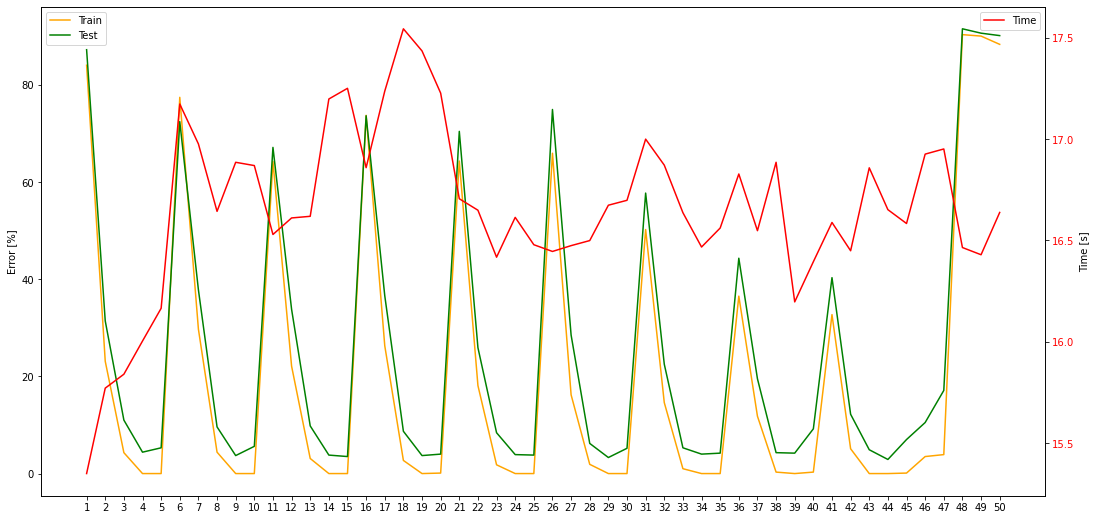

In [9]:
parameters_range = {'lr': (lr_min, lr_max, lr_n, 'logspace_10'),
                    'mini_batch_size': (mini_batch_size, mini_batch_size, 1, 'fixed'),
                    'momentum': (momentum_min, momentum_max, momentum_n, 'linspace'),
                    'num_hidden': (num_hidden, num_hidden, 1, 'fixed'),
                    'num_layers': (num_layers, num_layers, 1, 'fixed'),
                    'num_epochs': (num_epochs, num_epochs, 1, 'fixed')}
parameters = grid_hyperparameters(parameters_range)
results = grid_search(parameters)
visualize_experiment(results,'grid1-')

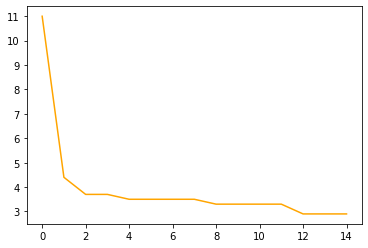

(range(0, 15),
 array([11. ,  4.4,  3.7,  3.7,  3.5,  3.5,  3.5,  3.5,  3.3,  3.3,  3.3,
         3.3,  2.9,  2.9,  2.9]))

In [10]:
visualize_run_time(results)

#### Bayesian optimisation

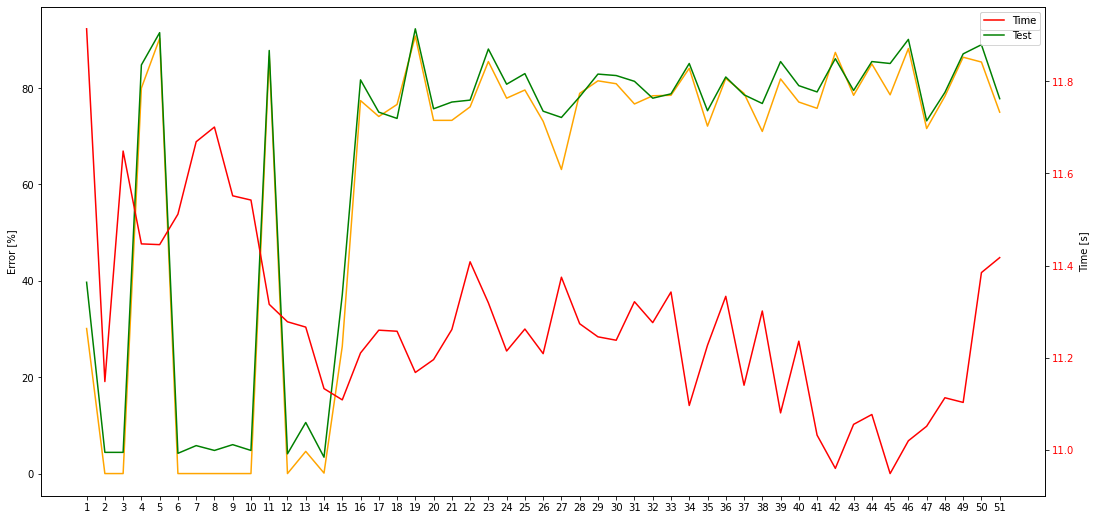

In [14]:
parameters_range = {'lr': (lr_min, lr_max, lr_n, 'logspace_10'),
                    'mini_batch_size': (50, 50, 1, 'fixed'),
                    'momentum': (momentum_min, momentum_max, momentum_n, 'linspace'),
                    'num_hidden': (num_hidden, num_hidden, 1, 'fixed'),
                    'num_layers': (num_layers, num_layers, 1, 'fixed'),
                    'num_epochs': (num_epochs, num_epochs, 1, 'fixed')}
bo_optimizer = TuneBO( parameters_range=parameters_range)
bo_optimizer.run(num_evals=50)
results=bo_optimizer.evaluation_history
visualize_experiment(results,'bayesian1-')

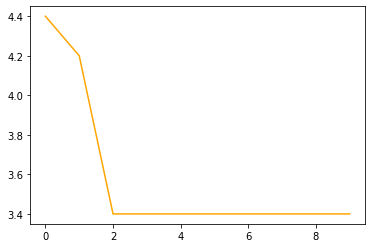

(range(0, 10), array([4.4, 4.2, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4]))

In [15]:
visualize_run_time(results)

In [206]:
from results import *
random_search_results = [a1, a2, a3, a4]
grid_search_results = [a5]
bayesian_optimiser_results = [a5, a6, a7, a8] 

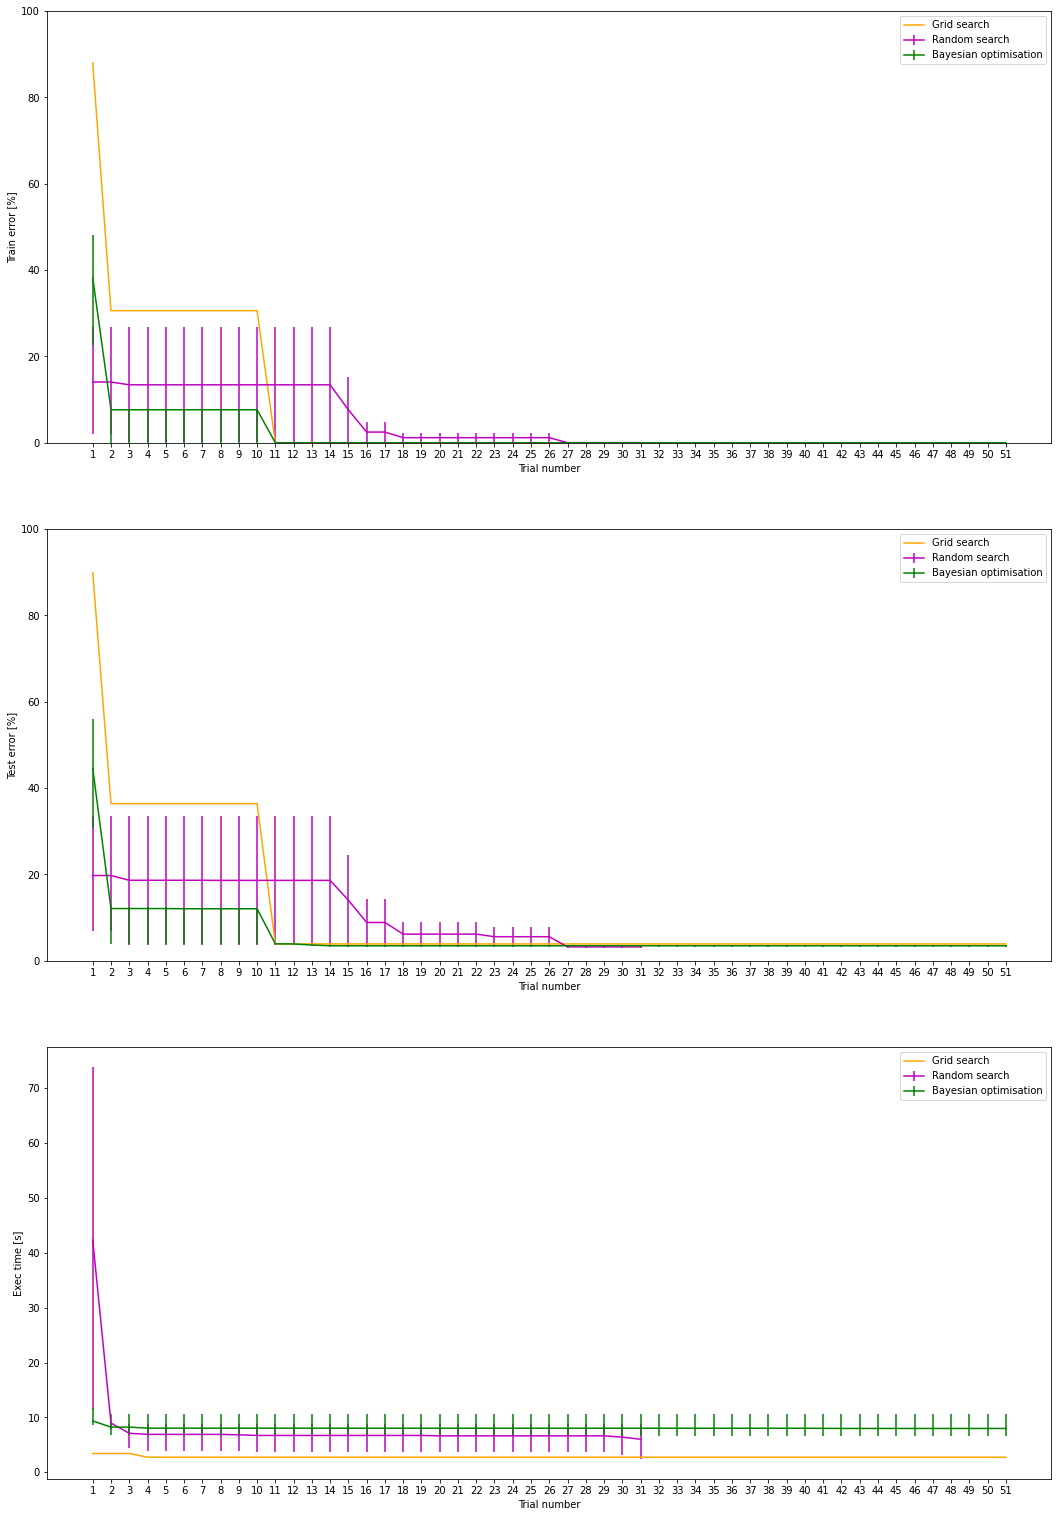

In [220]:
plot_all_results(random_search_results, grid_search_results, bayesian_optimiser_results)